### Realização dos imports

In [5]:
%pip install pandas matplotlib
import pandas as pd
from matplotlib import pyplot as plt

Note: you may need to restart the kernel to use updated packages.


### Preparação dos dados

In [6]:
# salvando o dataset em um pandas dataframe
df = pd.read_csv('data_clean.csv')

# criando uma coluna 'valor total' para análise futura
df['Valor total'] = df['Preco'] * df['Quantidade']

# extraindo o mês de cada registro para análise futura
df['Data'] = pd.to_datetime(df['Data'])
df['Mes'] = df['Data'].dt.month

# agrupando o total de vendas por data e por categoria
vendas_por_categoria = df.groupby(['Mes', 'Categoria'])['Valor total'].sum().reset_index()

# pivotando os dados para uma melhor visualização no gráfico
df_final = vendas_por_categoria.pivot(index='Mes', columns='Categoria', values='Valor total')

### Criação do gráfico de tendências de vendas

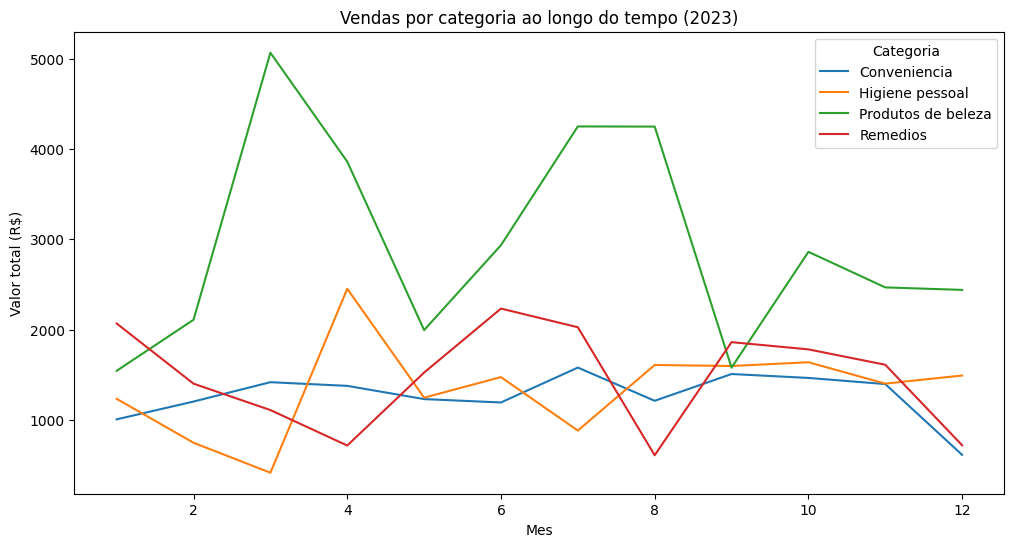

In [7]:
plt.figure(figsize=(12, 6))
for c in df_final.columns:
    plt.plot(df_final.index, df_final[c], label=c)

plt.title('Vendas por categoria ao longo do tempo (2023)')
plt.xlabel('Mes')
plt.ylabel('Valor total (R$)')
plt.legend(title='Categoria')
plt.show()


### A partir do gráfico acima, podemos identificar alguns padrões interessantes, como:

1. As vendas no mês 5 (maio) diminuíram para todas as categorias, exceto a categoria de remédios, que estava em uma crescente

    - Existem diversos fatores que podem ter sido causadores dessa baixa nas vendas, como:
    
        - Ausência de promoções
        - Concorrência
        - Sazonalidade
        - Mudanças no comportamento do consumidor

    - É necessário uma investigação mais aprofundada para entender o motivo da baixa nas vendas do período

2. No período da virada de ano (início e fim do ano) houve, também, uma baixa nas vendas de todas as categorias de produtos

3. No período de inverno (junho e julho) houve um aumento considerável na venda de remédios

    - Isso se deu, provavelmente, pela maior ocorrência de gripes e resfriados, causados pela mudança no clima

4. **OBS**: É nítido que os valores de venda mais altos no gráfico são os da categoria produtos de beleza, porém, a causa disso é a média no valor dos produtos desta categoria, que é bem mais alta a média de preço das outras categorias e não por essa categoria ter tido mais produtos vendidos. Isso pode ser confirmado a partir da tabela abaixo.

In [9]:
df.groupby('Categoria')['Quantidade'].sum().reset_index(name='Unidades').sort_values('Unidades', ascending=False)

,Categoria,Unidades
0,Conveniencia,1446
1,Higiene pessoal,1430
3,Remedios,1367
2,Produtos de beleza,1195
